<a href="https://colab.research.google.com/github/MarioAvolio/AI-Project/blob/main/assignment%204/1_KGE_with_PyKEEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyKEEN

PyKEEN (Python KnowlEdge EmbeddiNgs) is a Python package designed to train and evaluate knowledge graph embedding models (incorporating multi-modal information). (https://github.com/pykeen/pykeen)

For an evaluation of different available KGE libraries:

Zhang et al. 2022. NeuralKG: An Open Source Library for Diverse Representation Learning of Knowledge Graphs. https://doi.org/10.1145/3477495.3531669

In [ ]:
%%capture
## we install the version 1.9.0 since the newer 1.10.0 gives an exception with this notebook
!pip install pykeen==1.9.0

In [ ]:
import pykeen
pykeen.env()

Key,Value
OS,posix
Platform,Linux
Release,5.10.133+
Time,Thu Dec 22 08:05:42 2022
Python,3.8.16
PyKEEN,1.9.0
PyKEEN Hash,UNHASHED
PyKEEN Branch,
PyTorch,1.13.0+cu116
CUDA Available?,true


## Getting the data

In [ ]:
import pandas as pd

In [ ]:
countries_train_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/train.txt", sep="\t", names=["head", "relation", "tail"])

In [ ]:
countries_validation_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/valid.txt", sep="\t", names=["head", "relation", "tail"])

In [ ]:
countries_train_pd = pd.concat([countries_train_pd, countries_validation_pd])

We are including also validation because we want to be sure to avoid that corrupted triples may be real triples (in test or validation set).

In [ ]:
countries_test_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/test.txt", sep="\t", names=["head", "relation", "tail"])

In [ ]:
countries_train_pd

,head,relation,tail
0,western_africa,locatedin,africa
1,slovakia,neighbor,ukraine
2,slovakia,neighbor,hungary
3,slovakia,neighbor,austria
4,slovakia,neighbor,czechia
...,...,...,...
19,lesotho,locatedin,africa
20,romania,locatedin,europe
21,rwanda,locatedin,africa
22,ireland,locatedin,europe


## To PyKEEN TriplesFactory

In [ ]:
from pykeen.triples import TriplesFactory

In [ ]:
countries_train_pd[["head", "relation", "tail"]].values

array([['western_africa', 'locatedin', 'africa'],
       ['slovakia', 'neighbor', 'ukraine'],
       ['slovakia', 'neighbor', 'hungary'],
       ...,
       ['rwanda', 'locatedin', 'africa'],
       ['ireland', 'locatedin', 'europe'],
       ['djibouti', 'locatedin', 'africa']], dtype=object)

In [ ]:
training_labels = TriplesFactory.from_labeled_triples(
  countries_train_pd[["head", "relation", "tail"]].values,
  create_inverse_triples=False,
  entity_to_id=None,
  relation_to_id=None,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

testing_labels = TriplesFactory.from_labeled_triples(
  countries_test_pd[["head", "relation", "tail"]].values,
  create_inverse_triples=False,
  entity_to_id=training_labels.entity_to_id,
  relation_to_id=training_labels.relation_to_id,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

## Training Pipeline

In [ ]:
from pykeen.pipeline import pipeline
import torch

In [ ]:
pipeline_result_transe = pipeline(
    training=training_labels,
    testing=testing_labels,
    #dataset='Countries',
    model='TransE',
    model_kwargs=dict(embedding_dim=80),
    random_seed=256,
    optimizer = torch.optim.Adam,
    optimizer_kwargs=dict(lr=1.0e-02),
    training_kwargs=dict(num_epochs=30),
)

#pipeline_result.save_to_directory('countries1_transe')

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


Evaluating on cuda:0:   0%|          | 0.00/1.13k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds


In [ ]:
def print_metrics(pipeline_result):
  print(pipeline_result.training)
  print()
  print('hits@10', pipeline_result.get_metric('hits@10'))
  print('mr', pipeline_result.get_metric('mr'))
  print('mrr', pipeline_result.get_metric('mrr'))
  print()
  pipeline_result.plot_losses()

### Evaluation Metrics

TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1134)

hits@10 0.996031746031746
mr 2.0608465671539307
mrr 0.60746417979084



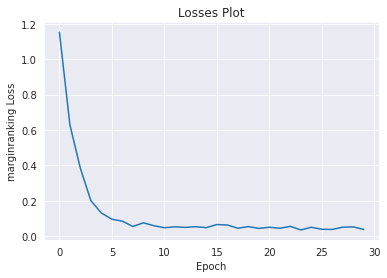

In [ ]:
print_metrics(pipeline_result_transe)

In [ ]:
## README if you just downgraded pykeen version to 1.9.0:
## you may have issues when loading the cached version of the dataset
## if so remove it with this command:
## rm -rf /root/.data/pykeen/datasets/countries/cache/ID
## replace ID with the foldername you see in the error (probably you may also remove the entire datasets folder in case of issues)

pipeline_result_transe_countries = pipeline(
    #training=training_labels,
    #testing=testing_labels,
    dataset='Countries',
    model='TransE',
    model_kwargs=dict(embedding_dim=80),
    random_seed=256,
    optimizer = torch.optim.Adam,
    optimizer_kwargs=dict(lr=1.0e-02),
    training_kwargs=dict(num_epochs=30),
)

#pipeline_result.save_to_directory('countries_transe')

INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.datasets.utils:Caching preprocessed dataset to file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1110, path="/root/.data/pykeen/datasets/countries/train.txt") to file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.datasets.base:Stored training factory to file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=24, path="/root/.data/pykeen/datasets/countries/test.txt") to file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.datasets.base:Stored testing factory to file:///root/.data/pykeen/dataset

Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds


TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1110, path="/root/.data/pykeen/datasets/countries/train.txt")

hits@10 0.7916666666666666
mr 11.4375
mrr 0.2655913829803467



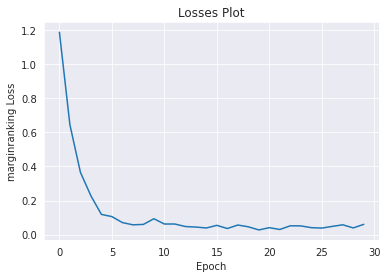

In [ ]:
print_metrics(pipeline_result_transe_countries)

## Get the data directly from PyKEEN

In [ ]:
from pykeen.datasets import Countries
countries = Countries()

In [ ]:
countries.summarize()

Countries (create_inverse_triples=False)
Name        Entities    Relations      Triples
----------  ----------  -----------  ---------
Training    271         2                 1110
Testing     271         2                   24
Validation  271         2                   24
Total       -           -                 1158
Head         Relation    tail
-----------  ----------  -------------
afghanistan  locatedin   asia
afghanistan  locatedin   southern_asia
afghanistan  neighbor    china
afghanistan  neighbor    iran
afghanistan  neighbor    pakistan



In [ ]:
countries_train_pd.query('head == "canada"')

,head,relation,tail
285,canada,locatedin,northern_america
552,canada,neighbor,united_states


## Predict

In [ ]:
# canada + locatedin = ?
from pykeen.models import predict
predict.get_prediction_df(
    model=pipeline_result_transe.model, head_label="canada", relation_label="locatedin", triples_factory=pipeline_result_transe.training,
)

,tail_id,tail_label,score,in_training
172,172,northern_america,-7.007985,True
40,40,canada,-8.105009,False
46,46,central_asia,-9.308308,False
224,224,southern_europe,-9.331941,False
5,5,americas,-9.980755,False
...,...,...,...,...
165,165,nicaragua,-13.925206,False
43,43,cayman_islands,-13.941570,False
97,97,guernsey,-13.955431,False
240,240,togo,-13.960766,False


In [ ]:
countries_train_pd.query('head == "italy"')

,head,relation,tail
37,italy,locatedin,europe
554,italy,locatedin,southern_europe
652,italy,neighbor,vatican_city
653,italy,neighbor,san_marino
654,italy,neighbor,france
655,italy,neighbor,slovenia
656,italy,neighbor,austria
657,italy,neighbor,switzerland


In [ ]:
# italy + locatedin = ?
predict.get_prediction_df(
    model=pipeline_result_transe.model, head_label="italy", relation_label="locatedin", triples_factory=pipeline_result_transe.training,
)

,tail_id,tail_label,score,in_training
224,224,southern_europe,-7.945762,True
113,113,italy,-8.105009,False
77,77,europe,-8.428397,True
265,265,western_europe,-9.167786,False
232,232,switzerland,-9.363967,False
...,...,...,...,...
85,85,gabon,-13.586580,False
203,203,samoa,-13.723747,False
43,43,cayman_islands,-13.760653,False
231,231,sweden,-13.910305,False


In [ ]:
# italy + neighbor = ?
predict.get_prediction_df(
    model=pipeline_result_transe.model, head_label="italy", relation_label="neighbor", triples_factory=pipeline_result_transe.training,
).head(20)

,tail_id,tail_label,score,in_training
113,113,italy,-3.892548,False
232,232,switzerland,-6.749665,True
204,204,san_marino,-6.776461,True
259,259,vatican_city,-7.156233,True
213,213,slovenia,-7.391206,True
16,16,austria,-7.509516,True
82,82,france,-7.704843,True
131,131,liechtenstein,-8.925457,False
152,152,monaco,-9.104342,False
6,6,andorra,-9.312655,False


In [ ]:
# vatican_city + neighbor = ?
predict.get_prediction_df(
    model=pipeline_result_transe.model, head_label="vatican_city", relation_label="neighbor", triples_factory=pipeline_result_transe.training,
)

,tail_id,tail_label,score,in_training
259,259,vatican_city,-3.892548,False
113,113,italy,-7.262767,True
204,204,san_marino,-8.097853,False
36,36,burkina_faso,-8.983893,False
255,255,united_states_virgin_islands,-9.115063,False
...,...,...,...,...
115,115,jamaica,-12.094078,False
62,62,denmark,-12.116710,False
212,212,slovakia,-12.156418,False
24,24,belize,-12.179025,False


## Visualize

In [ ]:
entities = list(countries.entity_to_id.keys())

In [ ]:
entity_embeddings = pipeline_result_transe.model.entity_representations[0]().cpu().detach().numpy().astype('float32')
entity_embeddings.shape

(271, 80)

In [ ]:
entity_embeddings

array([[ 0.07141765, -0.02043972, -0.0586786 , ..., -0.17231439,
         0.19119105,  0.07138817],
       [ 0.11573044, -0.1745968 ,  0.156079  , ..., -0.0664297 ,
        -0.07954074, -0.14663061],
       [ 0.26427704,  0.02181928, -0.09315932, ..., -0.22844695,
         0.02898793,  0.03534709],
       ...,
       [-0.14112423,  0.00069999, -0.0574276 , ...,  0.16342863,
        -0.05866748,  0.18664208],
       [-0.02224696, -0.12592842, -0.10745859, ...,  0.18660852,
        -0.10044515,  0.10956293],
       [-0.07997276,  0.14612493,  0.0198104 , ..., -0.00468664,
         0.05029063,  0.0755223 ]], dtype=float32)

In [ ]:
relation_embeddings = pipeline_result_transe.model.relation_representations[0]().cpu().detach().numpy().astype('float32')
relation_embeddings.shape

(2, 80)

In [ ]:
entity_embeddings

array([[ 0.07141765, -0.02043972, -0.0586786 , ..., -0.17231439,
         0.19119105,  0.07138817],
       [ 0.11573044, -0.1745968 ,  0.156079  , ..., -0.0664297 ,
        -0.07954074, -0.14663061],
       [ 0.26427704,  0.02181928, -0.09315932, ..., -0.22844695,
         0.02898793,  0.03534709],
       ...,
       [-0.14112423,  0.00069999, -0.0574276 , ...,  0.16342863,
        -0.05866748,  0.18664208],
       [-0.02224696, -0.12592842, -0.10745859, ...,  0.18660852,
        -0.10044515,  0.10956293],
       [-0.07997276,  0.14612493,  0.0198104 , ..., -0.00468664,
         0.05029063,  0.0755223 ]], dtype=float32)

In [ ]:
from operator import sub
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def quick_plot(labels, embedding, colors = None, plot = True):
  """
  we ignore the words we are not interested to reduce the time to compute
  the 2D embeddings, but this is an approximation.
  """

  if not colors:
    colors = ['b' for _ in labels]

  X = embedding
  pca = PCA(n_components=2)

  two_d_emb = pca.fit_transform(X)

  plt.scatter(two_d_emb[:, 0], two_d_emb[:, 1], c = colors)

  for index, label in enumerate(labels):
    # annotate
    plt.annotate(label, xy=(two_d_emb[index, 0], two_d_emb[index, 1]), )

  if plot:
    plt.gcf().set_size_inches(20, 10)
    plt.show()

  return plt, pca

In [ ]:
continents = set(countries_train_pd.query('relation == "locatedin"')['tail'].unique())

In [ ]:
def get_color(x):
  if x in continents:
    return 'red'
  else:
    return 'blue'

colors = [get_color(ent) for ent in entities]

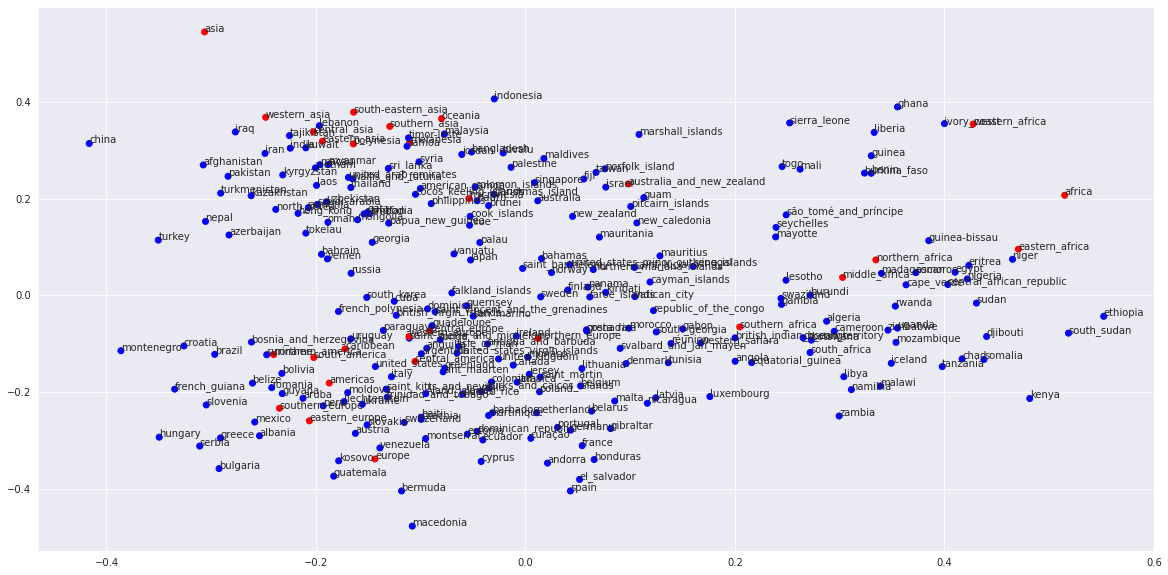

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>,
 PCA(n_components=2))

In [ ]:
quick_plot(entities, entity_embeddings, colors=colors)